In [1]:
import pandas as pd
df = pd.read_csv("/content/sample_data/Advertising.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [2]:
df.shape

(200, 5)

In [3]:
df.descinribe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
df = df.drop("Unnamed: 0", axis=1)

df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [6]:
corr = df.corr(numeric_only=True)
corr.style.background_gradient(cmap = 'copper_r')


,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


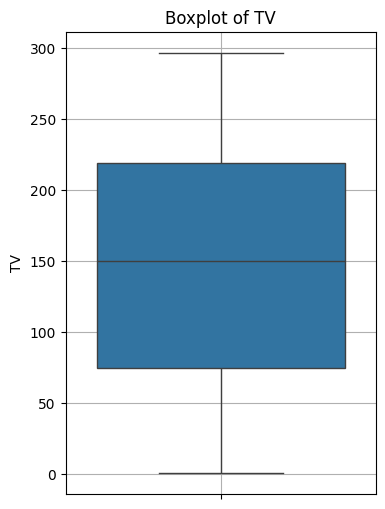

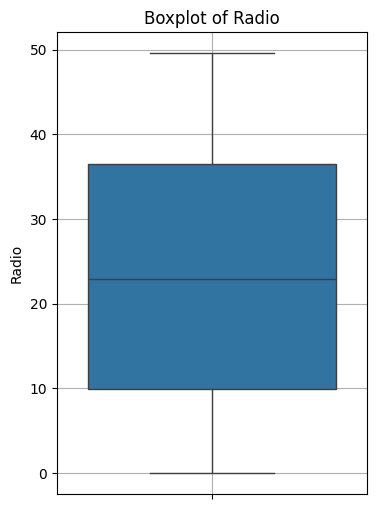

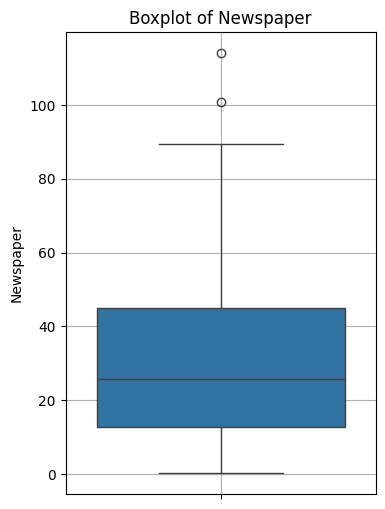

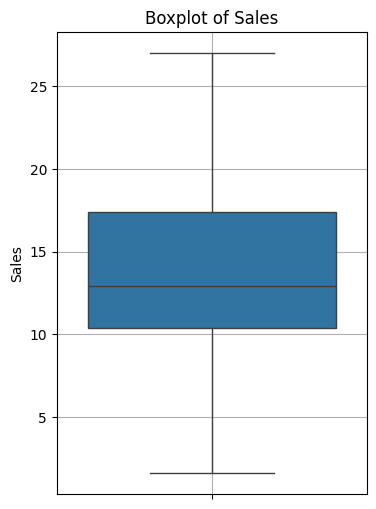

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in df.columns:
    plt.figure(figsize=(4, 6))
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.grid(True)
    plt.show()


In [8]:
Q1 = df["Newspaper"].quantile(0.25)
Q3 = df["Newspaper"].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR

df["Newspaper"] = df["Newspaper"].apply(lambda x: upper_bound if x > upper_bound else x)


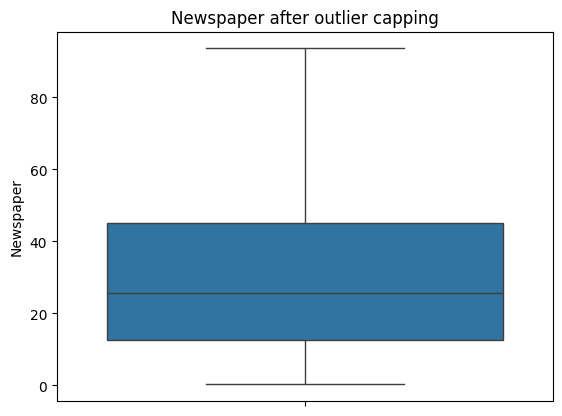

In [9]:
sns.boxplot(data=df["Newspaper"])
plt.title("Newspaper after outlier capping")
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


x = df.drop("Sales", axis=1)
y = df["Sales"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
lr_pred = lr_model.predict(x_test)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)

def evaluate_model(name, y_true, y_pred):
    print(f"\n----- {name} Results -----")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("R²:", r2_score(y_true, y_pred))

evaluate_model("Linear Regression", y_test, lr_pred)
evaluate_model("Random Forest Regressor", y_test, rf_pred)



----- Linear Regression Results -----
MAE: 1.459119339224443
MSE: 3.1714621850063565
R²: 0.8995215117097889

----- Random Forest Regressor Results -----
MAE: 0.6200999999999988
MSE: 0.5907322499999988
R²: 0.9812843792541843
